<img src="https://pm1.narvii.com/5887/02b61b74eaec1060b56a3fcfed42ecc24a457a2e_hq.jpg">

In this hands-on, we will use the Marvel dataset to practice using different plots to visualize distributions of values between groups. You are free to come up with you own questions and use one of the categorical plots to help answer each question. You are also free to build your own dataframe that contains a specific subset of the data to help you answer your questions.

The dataset is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv

Data source: https://github.com/fivethirtyeight/data/tree/master/comic-characters

| Variable |	Definition |
| :------- | :-
|page_id|	The unique identifier for that characters page within the wikia
|name|	The name of the character
|urlslug|	The unique url within the wikia that takes you to the character
|ID|	The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
|ALIGN|	If the character is Good, Bad or Neutral
|EYE|	Eye color of the character
|HAIR|	Hair color of the character
|SEX|	Sex of the character (e.g. Male, Female, etc.)
|GSM|	If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters)
|ALIVE|	If the character is alive or deceased
|APPEARANCES|	The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.)
|FIRST APPEARANCE|	The month and year of the character's first appearance in a comic book, if available
|YEAR|	The year of the character's first appearance in a comic book, if available

## Q1. How big is this dataset?
Use pandas to find out the number of rows and columns.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/marvel-wikia-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           16376 non-null  int64  
 1   name              16376 non-null  object 
 2   urlslug           16376 non-null  object 
 3   ID                12606 non-null  object 
 4   ALIGN             13564 non-null  object 
 5   EYE               6609 non-null   object 
 6   HAIR              12112 non-null  object 
 7   SEX               15522 non-null  object 
 8   GSM               90 non-null     object 
 9   ALIVE             16373 non-null  object 
 10  APPEARANCES       15280 non-null  float64
 11  FIRST APPEARANCE  15561 non-null  object 
 12  Year              15561 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.6+ MB


There are 13 columns and 16376 rows

## Q2. Strip plots
Come up with a question using this dataset and use a `strip` plot to help answer the question. State your question in a markdown cell. Recall that a `strip` plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

###From the year 2000, what kind of identity status is the most popular among popular characters?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Number of appearances')

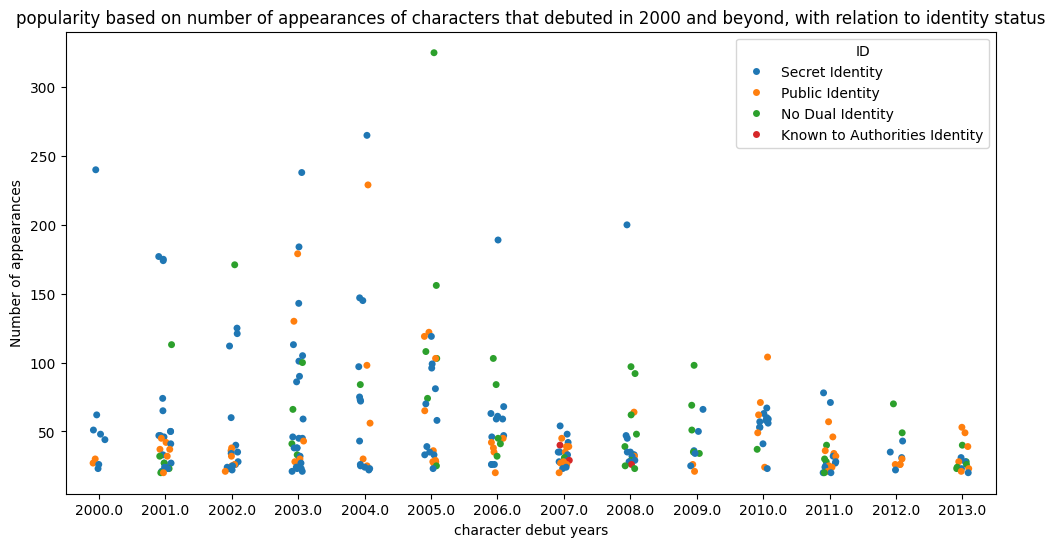

In [ ]:
q2 = df
q2 = q2[(q2['APPEARANCES'] >= 20) & (q2['Year'] >= 2000)]
plt.figure(figsize=(12, 6))
sns.stripplot(data = q2,
              x = "Year",
              y = "APPEARANCES",
              hue = "ID")
plt.title("popularity based on number of appearances of characters that debuted in 2000 and beyond, with relation to identity status");
plt.xlabel('character debut years')
plt.ylabel('Number of appearances')

## Q3. Multiples of Strip plots
Come up with a question using this dataset and use a strip plot that contains multiples (splitting the plot into multiples by a category that has two or more unique values) by using the `row` or `col` argument. State your question in a markdown cell. Recall that a strip plot is a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

###How popular are the characters by gender and Alignment?

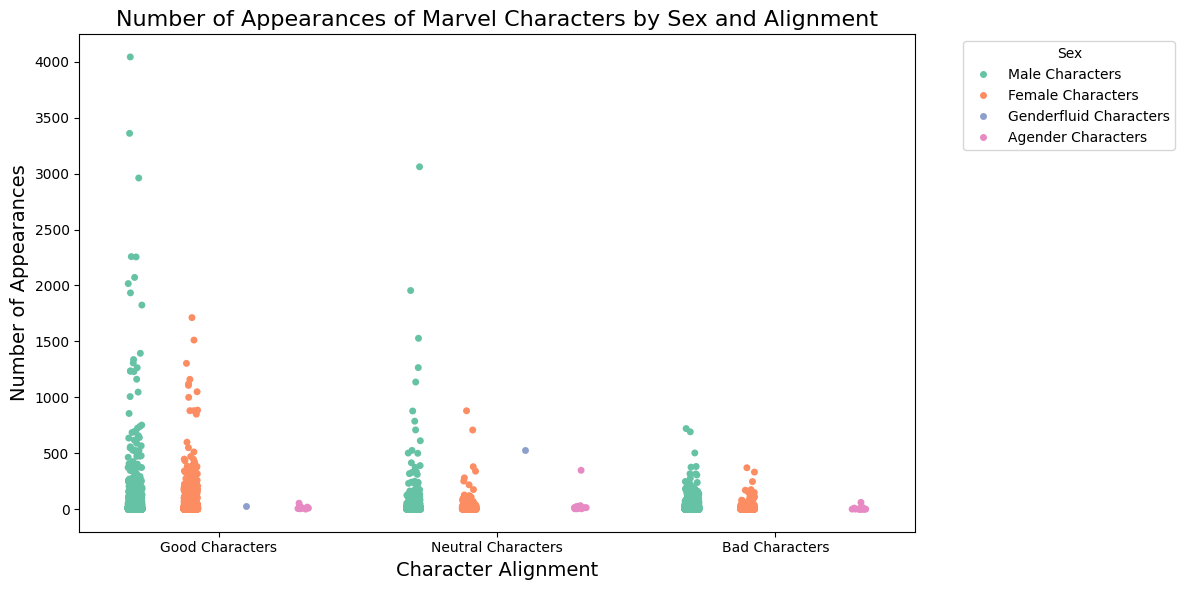

In [ ]:
df_cleaned = df.dropna(subset=['SEX', 'ALIGN', 'APPEARANCES'])

plt.figure(figsize=(12, 6))
sns.stripplot(x='ALIGN', y='APPEARANCES', hue='SEX', data=df_cleaned, dodge=True, palette='Set2', jitter=True)
plt.title('Number of Appearances of Marvel Characters by Sex and Alignment', fontsize=16)
plt.xlabel('Character Alignment', fontsize=14)
plt.ylabel('Number of Appearances', fontsize=14)
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Q4. Swarm plot
Come up with a question using this dataset and use a `swarm` plot to help answer the question. State your question in a markdown cell. Recall that a `swarm` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

### What is the most popular eye color for popular characters?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(59.59533854166669, 0.5, 'Eye color')

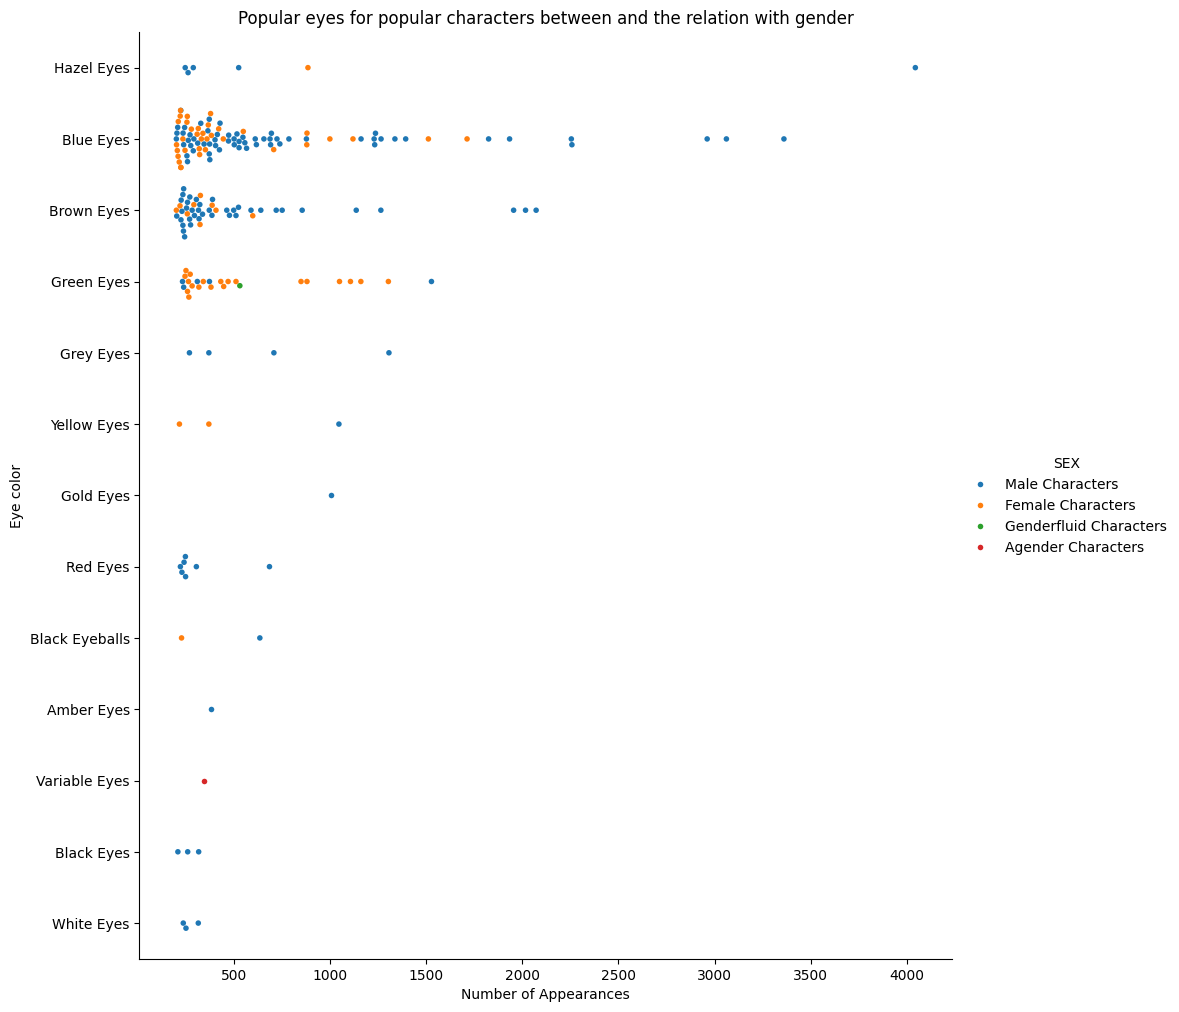

In [ ]:
df_cleaned = df.dropna(subset=['SEX', 'EYE', 'APPEARANCES'])
sns.catplot(data = df_cleaned[df_cleaned['APPEARANCES'] > 200],
            x ='APPEARANCES',
            y = 'EYE',
            hue = 'SEX',
            kind = 'swarm',
            size = 4,
            height = 10
)
plt.title('Popular eyes for popular characters between and the relation with gender')
plt.xlabel('Number of Appearances')
plt.ylabel('Eye color')

## Q5. Box plots
Box plot is one of the most commonly used plot for visualizing data distribution. We can convert the `swamp` plot into a `box` plot by simply changing the kind argument to `kind="box"`. Convert the swarm plot that you created in Q4 with a boxplot here. Set the appropriate arguments to make the plot more readable. Be sure to include a meaning title for the plot.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  stats = pd.DataFrame(mpl.cbook.boxplot_stats(value_data, whis=whis,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a futu

Text(59.59533854166669, 0.5, 'Eye color')

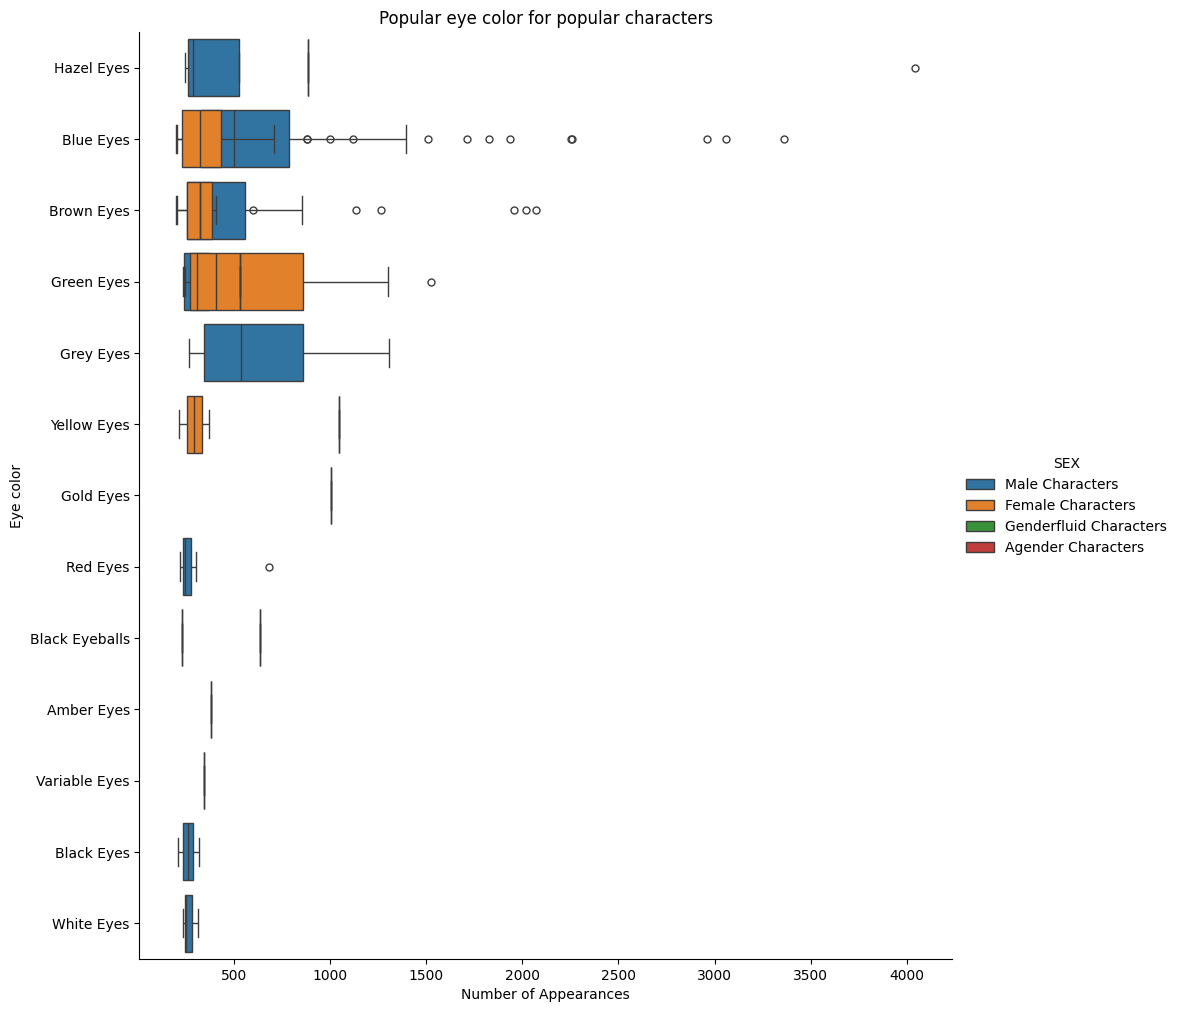

In [ ]:
df_cleaned = df.dropna(subset=['SEX', 'EYE', 'APPEARANCES'])
sns.catplot(data = df_cleaned[df_cleaned['APPEARANCES'] > 200],
            x ='APPEARANCES',
            y = 'EYE',
            hue = 'SEX',
            kind = 'box',
            height = 10,
            aspect = 1,
            dodge = False
)
plt.title('Popular eye color for popular characters')
plt.xlabel('Number of Appearances')
plt.ylabel('Eye color')

## Q6. Violin plots
Come up with a question using this dataset and use a `violin` plot to help answer the question. State your question in a markdown cell. Recall that a `violin` plot is also a categorical plot where one axis is category and the other is a continuous variable. Set the appropriate arguments to make the plot more readable. You might want to set setting `cut` to zero if the distribution spreads beyond the values of the data in the dataset. Be sure to include a meaning title for the plot.

###What are the most used character sexual orientation?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(31.29058641975307, 0.5, 'Character sexual orientation')

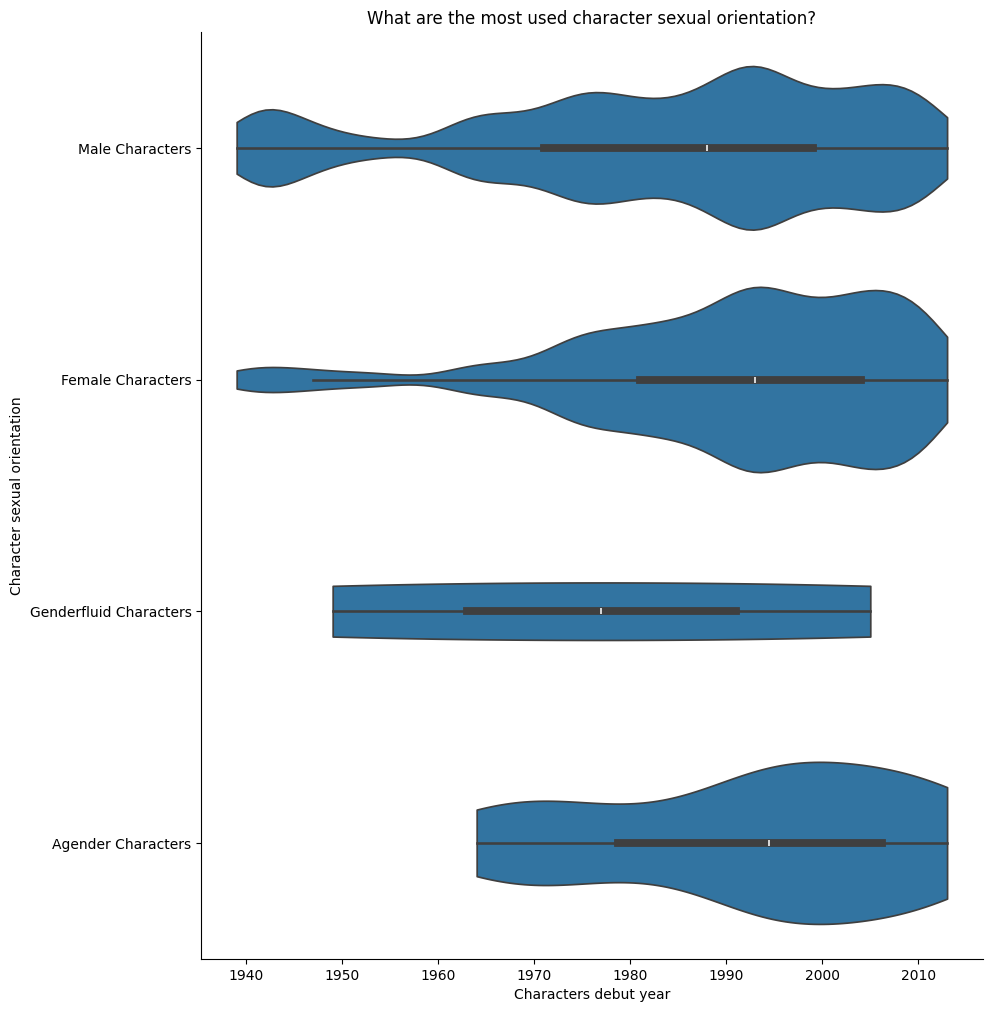

In [ ]:
df_cleaned = df.dropna(subset=['SEX', 'Year'])
sns.catplot(
    data=df_cleaned,
    x="Year",
    y="SEX",
    kind="violin",
    cut=0,
    height = 10
    )
plt.title('What are the most used character sexual orientation?')
plt.xlabel('Characters debut year')
plt.ylabel('Character sexual orientation')

## Bonus:
Because violin plots are symetrical, when we have only two categories we can put one on each side with `split = True`. Try to create a violin plot using the `split` parameter. You will need to come up with a dataframe using this dataset with data that has two categories.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


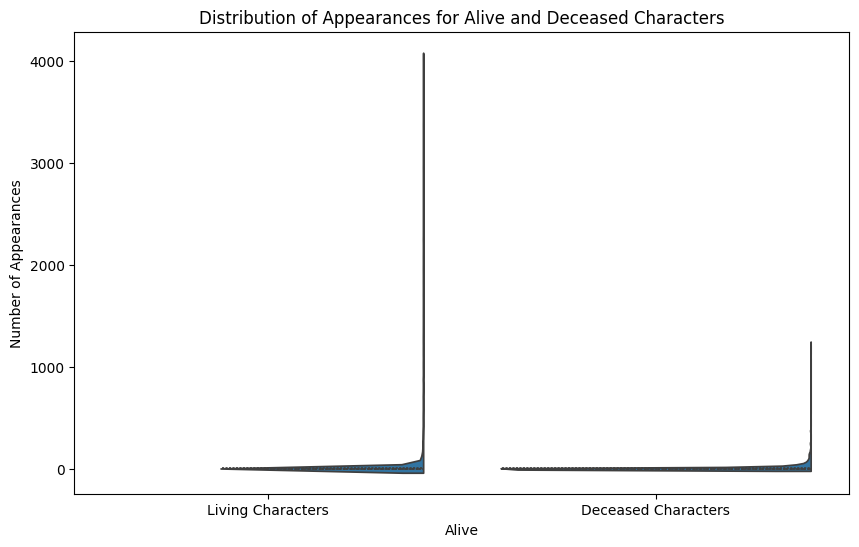

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ALIVE', y='APPEARANCES', data=df_cleaned, split=True, inner="quart")
plt.title('Distribution of Appearances for Alive and Deceased Characters')
plt.xlabel('Alive')
plt.ylabel('Number of Appearances')
plt.show()